In [1]:
from sklearn.datasets import load_wine
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC # "Support vector classifier"
from matplotlib.pyplot import clf
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
# Read the wine dataset
dataset = load_wine()
df = pd.DataFrame(data=dataset['data'], columns=dataset['feature_names'])
df = df.assign(target=pd.Series(dataset['target']).values)

In [3]:
# Filter the irrelevant columns
df = df[['alcohol', 'magnesium', 'target']]
# Filter the irrelevant label
df = df[df.target != 0]

In [4]:
train_df, val_df = train_test_split(df, test_size=30, random_state=3)

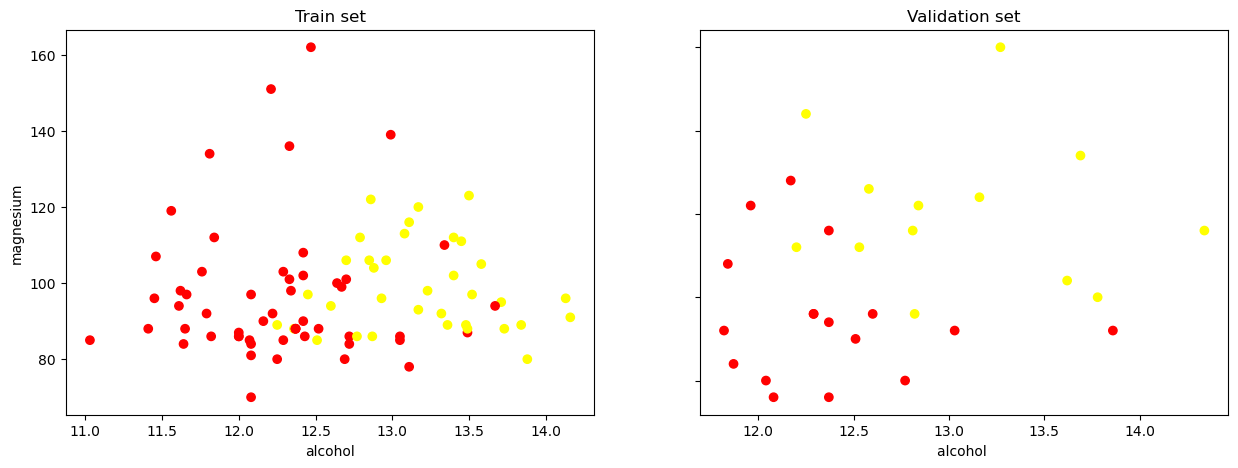

In [5]:
#Q1
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15,5))
axes[0].scatter(x=train_df.iloc[:,0],y=train_df.iloc[:,1],c=train_df.iloc[:,2], cmap='autumn')
axes[0].set_title('Train set')
axes[0].set(xlabel='alcohol', ylabel='magnesium')
axes[0].label_outer()
axes[1].scatter(x=val_df.iloc[:,0],y=val_df.iloc[:,1],c=val_df.iloc[:,2], cmap='autumn')
axes[1].set_title('Validation set')
axes[1].set(xlabel='alcohol ', ylabel='magnesium')
axes[1].label_outer()

In [27]:
C = [0.01,0.05,0.1]
models = [SVC(kernel='linear', C=i) for i in C]
X_train = train_df[['alcohol','magnesium']]
y_train =train_df['target']
X_val = val_df[['alcohol','magnesium']]
y_val = val_df['target']
for model in models:
    model.fit(X_train, y_train)


In [7]:
def plot_svc_decision_function(model, ax=None, plot_support=True):
    """Plot the decision function for a 2D SVC"""
    if ax is None:
        ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()

    # create grid to evaluate model
    x = np.linspace(xlim[0], xlim[1], 30)
    y = np.linspace(ylim[0], ylim[1], 30)
    Y, X = np.meshgrid(y, x)
    xy = np.vstack([X.ravel(), Y.ravel()]).T
    P = model.decision_function(xy).reshape(X.shape)

    # plot decision boundary and margins
    ax.contour(X, Y, P, colors='k',
               levels=[-1, 0, 1], alpha=0.5,
               linestyles=['--', '-', '--'])

    # plot support vectors
    if plot_support:
        ax.scatter(model.support_vectors_[:, 0],
                   model.support_vectors_[:, 1],
                   s=50, linewidth=1, facecolors='none', edgecolor='black');
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)
    plt.autoscale(tight=True)

In [28]:
def plot_svm(i,X,y,model,ax=None,plot_support=True):
        ax = ax or plt.gca()
        ax.scatter(X.iloc[:, 0], X.iloc[:, 1], c=y, s=10, cmap='cool')
        if i==0:
            ax.set_xlim(7, 22)
            ax.set_ylim(60, 180)
        else:
            ax.set_xlim(10, 15)
            ax.set_ylim(60, 180)
        ax.set_xlabel("alcohol")
        ax.set_ylabel("magnesium")
        plot_svc_decision_function(model, ax, plot_support)


C:\Users\user\anaconda3\envs\seaborn\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
C:\Users\user\anaconda3\envs\seaborn\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
C:\Users\user\anaconda3\envs\seaborn\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
C:\Users\user\anaconda3\envs\seaborn\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
C:\Users\user\anaconda3\envs\seaborn\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
C:\Users\user\anaconda3\envs\seaborn\lib\site-packages\sklearn\base.py:450: UserWarning: X does

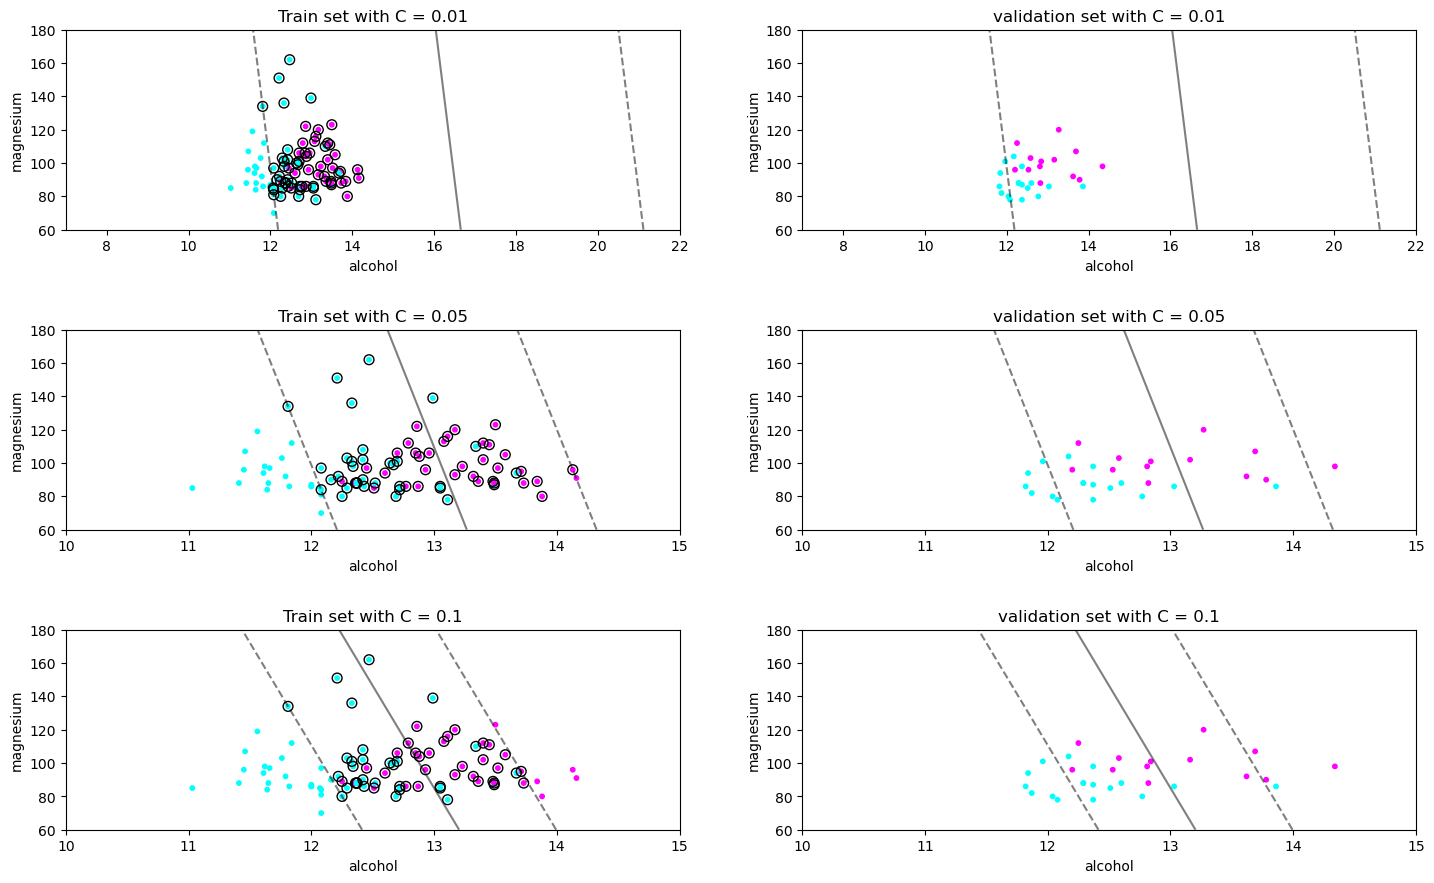

In [29]:
#Q2
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(20, 10))
plt.subplots_adjust(bottom=0.1, right=0.8, top=0.9,hspace=0.5)
for i,c in enumerate(C):
    for j in range(2):
        if j==0:
            plot_svm(i,X_train,y_train,models[i],ax=axes[i][j],plot_support=True)
            axes[i][j].set_title('Train set with C = {0}'.format(c))
        else:
            plot_svm(i,X_val,y_val,models[i],ax=axes[i][j],plot_support=False)
            axes[i][j].set_title('validation set with C = {0}'.format(c))

In [30]:
%%latex
Q3:
In the SVM quadratic optimization we fix the margin to 1.
$\qquad\qquad margin = \min_{i\in[m]}{|\langle \hat{w},x_i\rangle|} = 1$
Multiply the equation by $\frac{1}{\lvert\lvert w_0\rvert\rvert}$ and get (inner product Homogeneous),
$\qquad\qquad min_{i\in[m]}{|\langle \frac{w_0}{\lvert\lvert w_0\rvert\rvert},x_i\rangle|} =
    \frac{1}{\lvert\lvert w_0\rvert\rvert}$
Recall that $\hat{w} = \frac{w_0}{\lvert\lvert w_0\rvert\rvert}$ we get,
$\qquad\qquad margin = \frac{1}{\lvert\lvert w_0\rvert\rvert}$

<IPython.core.display.Latex object>

C:\Users\user\AppData\Local\Temp\ipykernel_50772\1077188680.py:6: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "go-" (-> marker='o'). The keyword argument will take precedence.
  plt.plot(margins.keys(),margins.values(),'go-',marker='o',markerfacecolor='r',markersize=12)


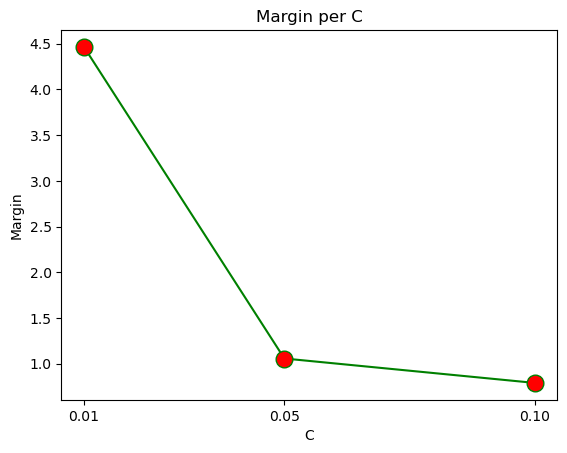

In [33]:
#Q4
margins = dict()
for m in models:
    margin = 1 / np.linalg.norm(m.coef_[0])
    margins[m.C]=margin
plt.plot(margins.keys(),margins.values(),'go-',marker='o',markerfacecolor='r',markersize=12)
plt.title('Margin per C')
plt.xlabel('C')
plt.ylabel('Margin')
plt.xticks(C)
plt.show()


([<matplotlib.axis.XTick at 0x1efe89054f0>,
 [Text(0, 0, ''), Text(0, 0, ''), Text(0, 0, '')])

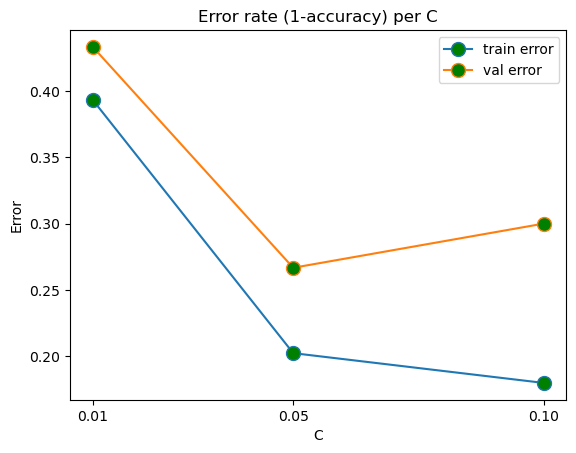

In [44]:
#Q5
train_error = []
val_error = []
for m in models:
    train_error.append(1-m.score(X_train, y_train))
    val_error.append(1-m.score(X_val, y_val))
plt.plot(C,train_error,label='train error',marker='o',markerfacecolor='g',markersize=10)
plt.plot(C,val_error,label='val error',marker='o',markerfacecolor='g',markersize=10)
plt.title('Error rate (1-accuracy) per C')
plt.legend()
plt.xlabel('C')
plt.ylabel('Error')
plt.xticks(C)

Q5:
    For very small c values, the margin is very wide, thus we will get
    a lot of wrong predictions, leading to higher error rates on the training and validation sets.
    We know that the larger the C, the smaller the margin, that might lead to overfitting on the training set
    So the chance of wrong predictions on the validation set is higher.
    The loss function consists of 2 factors, W and "sigma".
    Minimizing the former, maximizes the margin, and minimizing the latter,
    minimizes the error since C is a coefficient of "sigma",
    the smaller we want to make the error (increasing C) the smaller the margin becomes.


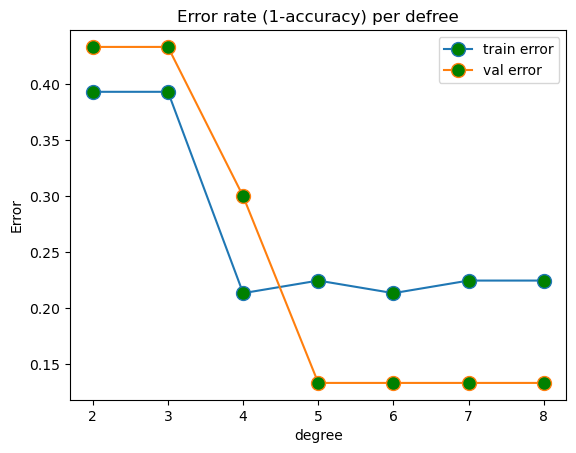

In [60]:
#Q6
train_error = dict()
val_error = dict()
degrees = [*range(2,9)]
for d in degrees:
    model = SVC(kernel='poly',degree=d,C=1)
    model.fit(X_train, y_train)
    train_error[d] = 1-model.score(X_train, y_train)
    val_error[d] = (1-model.score(X_val, y_val))
plt.plot(degrees,train_error.values(),label='train error',marker='o',markerfacecolor='g',markersize=10)
plt.plot(degrees,val_error.values(),label='val error',marker='o',markerfacecolor='g',markersize=10)
plt.title('Error rate (1-accuracy) per defree')
plt.legend()
plt.xlabel('degree')
plt.ylabel('Error')
max_train_d = max(train_error,key=lambda x: train_error[x])
max_val_d = max(val_error,key=lambda x: val_error[x])
min_train_d = min(train_error,key=lambda x: train_error[x])
min_val_d = min(val_error,key=lambda x: val_error[x])

Q6:
    We can infer that in higher dimension the data is easier to separate.
    Perhaps, in a higher dimension is separable.
    If that's not the case, the higher dimension makes it easier to find a hyperplane
    with a wider margin than a lower dimension

C:\Users\user\anaconda3\envs\seaborn\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
C:\Users\user\anaconda3\envs\seaborn\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
C:\Users\user\anaconda3\envs\seaborn\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
C:\Users\user\anaconda3\envs\seaborn\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


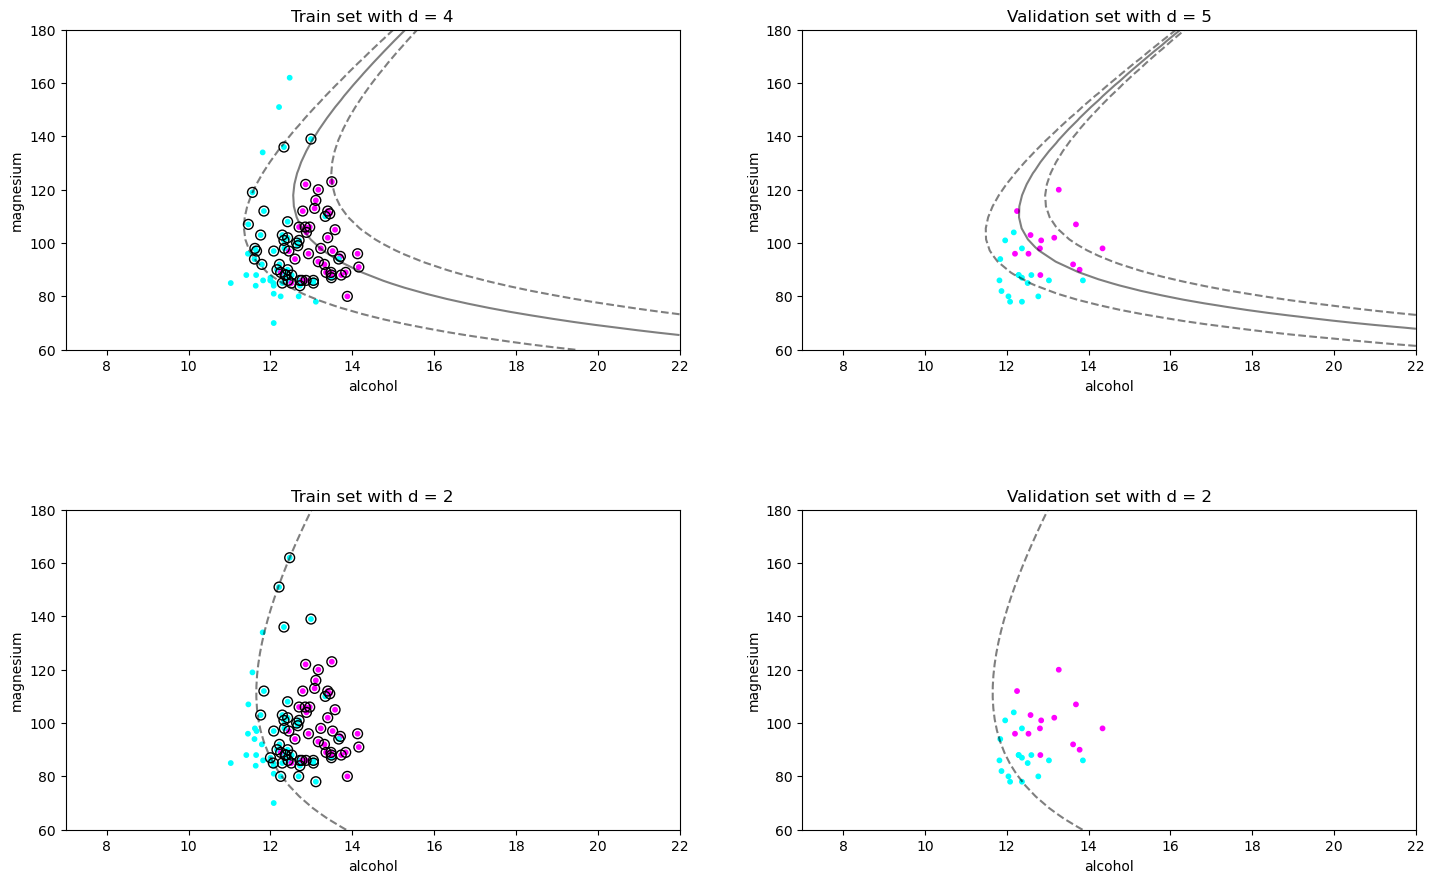

In [70]:
#Q7
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(20, 10))
plt.subplots_adjust(bottom=0.1, right=0.8, top=0.9,hspace=0.5)
train_d = [min_train_d,max_train_d]
val_d = [min_val_d,max_val_d]
for i,d in enumerate(train_d):
    model = SVC(kernel='poly',degree=d,C=1)
    model.fit(X_train, y_train)
    plot_svm(0, X_train, y_train, model, ax=axes[i][0], plot_support=True)
    axes[i][0].set_title(f'Train set with d = {d}')
for i,d in enumerate(val_d):
    model = SVC(kernel='poly',degree=d,C=1)
    model.fit(X_train, y_train)
    plot_svm(0, X_val, y_val, model, ax=axes[i][1], plot_support=False)
    axes[i][1].set_title(f'Validation set with d = {d}')